# <a href="https://thetahat.ru/courses/ph-ds-2025-spr">Phystech@DataScience</a>
## Домашнее задание 3

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<!-- <b><font color="blue">Легкая часть</font></b> (достаточно на "хор"): -->
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 70 баллов
* Задача 3 &mdash; 20 баллов

-----

In [ ]:
# Bot check

# HW_ID: phds_hw3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

from typing import List, Callable, Tuple

import seaborn as sns
sns.set_theme('notebook', font_scale=1.2, palette='Set2')

from tqdm.notebook import tqdm

## Задача 1

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернулиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков:
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

При добавлении регуляризации к модели логистической регрессии оптимизируемый функционал принимает вид

$$
    F(\theta) = -\sum_{i=1}^n \left[Y_i \log{\sigma(\theta^T x_i)} + (1 - Y_i) \log{\left(1 - \sigma(\theta^T x_i)\right)}\right] + \lambda\theta^T \theta
$$

1. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

2. Покажите, что $F(\theta)$ &mdash; выпуклая функция по $\theta$ и, как следствие, имеет единственный экстремум, являющийся глобальным максимумом. *Указание*. Посчитайте гессиан (матрицу вторых производных) и покажите, что она положительно определена.

3. Опишите, как может вести себя решение при отсутствии регуляризации, то есть при $\lambda = 0$

## Задача 2

### Введение


**РНК-интерференция** (англ. RNA interference; RNAi) &mdash; это естественный биологический процесс и перспективный с медицинской точки зрения метод подавления экспрессии генов в эукариотических клетках. Его применяют для изучения функций генов, [разработки новых лекарств](https://www.biopreparations.ru/jour/article/view/575?utm_source=chatgpt.com), а также при генной терапии.

Механизм РНК-интерференции работает так: поступившая в клетку экзогенная двухцепочечная РНК связывается с <abbr title="Рибонуклеазы (или РНК-азы) - ферменты-нуклеазы, катализирующие  расщепление РНК на более мелкие компоненты. Dicer относится к семеству РНКазы III.">рибонуклеазой Dicer</abbr>, которая нарезает ее на  ***малые интерферирующие РНК,*** **или миРНК**  **(small interfering RNA, siRNA)** &mdash; *небольшие фрагменты длиной 20–25 пар нуклеотидов*. Эти фрагменты взаимодействуют с <abbr title="RNA-induced silencing complex или RISC — мультибелковый комплекс, в состав которого входит один из белков семейства Argonaute и малые интерферирующие РНК. Белки Argonaute имеют эндонуклеазную активность по отношению к мРНК, комплементарным связанному фрагменту siRNA.">комплексом RISC</abbr>, который использует siRNA как «наводку» для поиска нужной молекулы мРНК и расщепляет её, подавляя работу гена.

> 📌 *Примечание.* В русскоязычной литературе аббревиатурой "миРНК" обозначают как siRNA, так и <abbr title="МикроРНК (miRNA) — это короткие эндогенные РНК, которые, подобно siRNA, подавляют экспрессию генов, но связываются они с мРНК частично комплементарно, регулируя множество мишеней и подавляя трансляцию, а не вызывая прямую деградацию.">miRNA (микро-РНК)</abbr>, что нередко приводит к путанице. Условимся, под миРНК мы будем иметь в виду именно *малые интерферирующие РНК (siRNA)*.


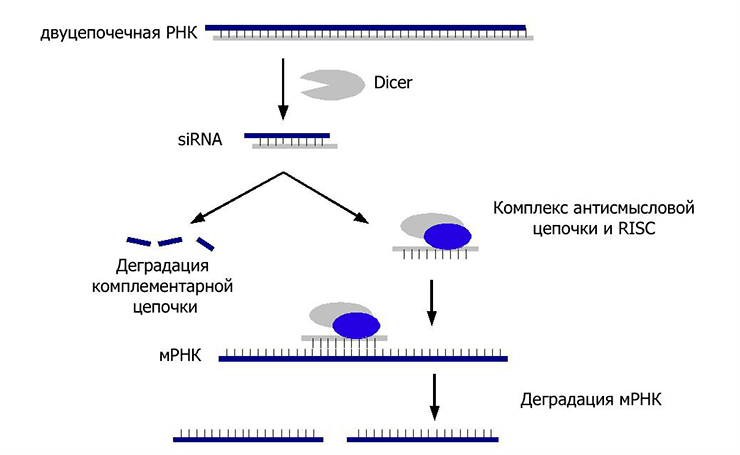



*Проблема* заключается в том, что не все миРНК одинаково эффективны в подавлении экспрессии генов. Способность миРНК к ингибированию измеряется с помощью количественной <abbr title="ПЦР с обратной транскрипцией">ОТ-ПЦР</abbr>, *однако* существуют гипотезы, что определенные характеристики олигонуклеотидов могут предсказать их эффективность.

**Описание датасета**

[Датасет](https://www.kaggle.com/datasets/livtoft/sirna-activity/data) содержит 653 олигонуклеотида, информацию о целевой мРНК, последовательности миРНК, а также характеристики, которые могут быть предикторами активности миРНК.

* `target mRNA` &mdash; идентификатор целевой мРНК.

* `Start / End` &mdash; начальная и конечная позиции миРНК на целевой мРНК.

* `Sequence` &mdash; последовательность нуклеотидов в миРНК.

* `G / U` &mdash; количество нуклеотидов гуанина (G) и урацила (U) в миРНК.

* `bi` &mdash; стабильность димеров антисмысловой цепи (энергия связи между одинаковыми цепями).

* `uni` &mdash; внутримолекулярная стабильность антисмысловой цепи (способность цепи формировать петли или шпильки).

* `duplex` &mdash; энергия связи между антисмысловой и смысловой цепями миРНК (чем меньше, тем прочнее комплекс).

* `Pos1,2,6,13,14,18` &mdash; стабильность связи пар оснований в ключевых позициях siRNA при взаимодействии с мРНК.
* `Dif_5-3` &mdash; разница стабильности концов миРНК (5' и 3').

* `Content+ / Content-` &mdash; содержание нуклеотидов на положительной и отрицательной цепи.

* `Cons+ / Cons- / Cons_Sum` &mdash; консервативность последовательностей (на положительной, отрицательной цепи и суммарно).

* `Hyb19` &mdash; энергия гибридизации с мРНК (длина 19 пар оснований).

* `target` &mdash; цель (идентификатор).

* `Activity` &mdash; процент остаточной экспрессии целевой мРНК. **Чем меньше активность, тем выше эффективность подавления экспрессии гена.**

Согласно [оригинальной статье](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-65#Tab1), эти признаки должны помочь выявлять миРНК, наиболее эффективно подавляющие экспрессию гена.

### 1. Загрузка и подготовка данных
Загрузите датасет и выведите первые несколько строк.

Проверьте, есть ли в данных пропуски? Все ли столбцы имеют числовой формат?

In [ ]:
data.info()

**Ответ:**

Отличается ли масштаб у числовых признаков?

In [ ]:
data.describe()

**Ответ:**

Посмотрим на распределение активности:

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(data['Activity']);

Удивление могут вызывать значения активности свыше 100%. Как будто бы в некоторых случаях последовательность миРНК вместо подавления, напротив, усиливала экспрессию мРНК. Эта тайна, покрытая мраком, остаётся на совести экспериментаторов 🤔. Более важно научиться предсказывать эффективные последовательности, при применении которых остаточная активность мала. В качестве порогового значения возьмём 30% и будем пытаться отделять (классифицировать) эффективные и неэффективные цепочки миРНК по такому правилу:

*   1 (эффективная): миРНК снижает уровень мРНК более чем на 70% (значение активности ≤ 30%).

*   0 (неэффективная): миРНК снижает уровень мРНК менее чем на 30% (значение активности > 30%).

Установите порог, выделите матрицу признаков и целевую переменную:

In [ ]:
<...>

X.shape, y.shape

((653, 21), (653,))

Посчитайте количество нулей и единиц таргете. Лучше всего представить ответ в виде графика с двумя столбцами, высота которых соответствует количеству объектов класса (см. например, [`sns.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html)). Есть ли дисбаланс между классами?

**Ответ:** 

Хорошо ли обусловлена матрица $X$? О чём это говорит?

**Ответ:** 

Для наглядности, выведите матрицу корреляций. Что означают элементы матрицы? А в нашем случае?

**Ответ:**

Разделите данные на обучающую и тестовую выборки в отношении 3:2. Вам не подойдет стандартный метод `test_train_split`, так как в данных есть группы (столбец `Target seq`): для каждой целевой последовательности подбирались различные цепочки миРНК:

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(x=data['Target seq'])
plt.xticks(rotation=90, fontsize=11)
plt.title('Количество записей в данных по всем последовательностям (группам)');

Реализуйте разделение на тренировочную и тестовую выборки так, чтобы все группы попали целиком только в одну из частей. Вы можете реализовать алгоритм самостоятельно или воспользоваться готовыми решениями, например [`GroupShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html), используя метод `groups`.

Выведите что-либо, подтверждающее корректность вашего разбиения. Чем плохо, если элементы выборки, соответствующие одной и той же целевой последовательности, попадут одновременно в тестовую и обучающую выборку?

**Ответ:**

Выведите распределение данных по классам для обеих выборок, аналогично тому, как вы делали в начале для всей выборки. Одинаково ли распределение на обучающей и тестовой выборках?

**Ответ:**

Далее, при построении классификатора, учитывайте диcбаланс, если он есть: используйте взвешенную версию логистической регрессии (см. параметр `class_weight`) и метрику [`balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score) для оценки качества модели. **❗Это очень важно❗**

Стандартизируйте данные.

### 2. Модельки, модельки, модельки...

#### 2.1 Самый популярный класс

Найдите самый популярный класс в обучающей выборке и посчитайте точность ответа на трейне и тесте только этим классом &mdash; константой. Отличается ли взвешенная точность от обычной?

Взвешенная точность на тесте: 0.500, на трейне: 0.500
Обычная точность    на тесте: 0.525, на трейне: 0.563


**Вывод:**

#### 2.2 Логистическая регрессия без регуляризации

Обучите классическую логистическую регрессию без регуляризации и визуализируйте точность ответа на трейне и тесте. **Свободный коэффициент необходимо исключить из модели**.

<details>
  <summary> Подсказка ✍️ </summary>
  
> Чему равен аргумент `penalty` по умолчанию?

</details><br/>

**Вывод:**

#### 2.3 Логистическая регрессия с регуляризацией

За что отвечает гиперпараметр `C` у класса `LogisticRegression`?

**Ответ:**

Вам необходимо исследовать зависимость от `C` следующих величин:
1. Accuracy на трейне
2. Accuracy на тесте
3. Коэффициенты модели

Чтобы не приходилось постоянно обучать модели при одних и тех же сетках `C`, предлагается написать функцию, которая будет принимать на вход вид штрафа `penalty`, границы диапазона `C`, и саму выборку. На каждой итерации вычисляйте все величины и сохраняйте в виде списков. Для мониторинга времени работы используйте функцию `tqdm`. Пример использования:

```
from tqdm.notebook import tqdm
for C in tqdm(C_grid):
    <тело цикла>
```

Не забудьте также про имеющийся дисбаланс классов.

In [ ]:
def train_alpha_grid(
    min_log_C: float,
    max_log_C: float,
    resolution: int,
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    X_test: pd.DataFrame,
    y_test: np.ndarray,
    penalty: str,
    solver: str = 'newton-cholesky',
    max_iter: int = 100
) -> Tuple[np.ndarray, List[List[float]], List[float], List[float]]:
    """Обучает модель LogisticRegression для разных значений параметра регуляризации C,
    сохраняет коэффициенты, вычисляет accuracy на обучающей и тестовой выборках.

    Args:
        min_log_C (float): минимальное значение log10(C) для сетки.
        max_log_C (float): максимальное значение log10(C) для сетки.
        resolution (int): число точек на сетке C.
        X_train (pd.DataFrame): обучающая выборка (признаки).
        y_train (np.ndarray): отклик на обучающей выборке.
        X_test (pd.DataFrame): тестовая выборка (признаки).
        y_test (np.ndarray): отклик на тестовой выборке.
        penalty (str): тип регуляризации ('l1', 'l2', 'elasticnet', 'none').
        solver (str, optional): метод оптимизации параметров модели. По-умолчанию 'newton-cholesky'.
        max_iter (int, optional): максимальное количество итераций для оптимизации. По-умолчанию 100.

    Returns:
        Tuple[np.ndarray, List[List[float]], List[float], List[float]]:
            - C_grid (np.ndarray): сетка значений C,
            - coefs_list (List[List[float]]): список коэффициентов для каждого значения C,
            - baccuracy_train_list (List[float]): список balanced accuracy на обучающей выборке для каждого значения C,
            - baccuracy_test_list (List[float]): список balanced accuracy на тестовой выборке для каждого значения C.
    """

    <...>

Проведите эксперимент для 3-х разных моделей логистической регрессии с различными типами регуляризации:
1.  $L_1$-регуляризация
2.  $L_2$-регуляризация
3.  Комбинированная регуляризация с параметром `l1_ratio=0.5`.

>*Рекомендации*
>*   Подберите диапазоны значений для гиперпараметра `C`. Не берите слишком узкие, чтобы видеть на графике всю картину. Для слишком широких границ придётся брать больше точек.
>*   Вам не нужна очень частая сетка гиперпараметра `C`. При отладке кода можно вообще использовать сетку из 2-3 значений.
>*   Вы можете столкнуться с различными ошибками и `warning`-ами (например, неверный `solver`, отсутствие сходимости,  и т.д.) Постарайтесь настроить гиперпараметры модели таким образом, чтобы ошибки исчезли, а количество предупреждений было минимальным.
>*  Для ускорения работы программы можно использовать параллельные вычисления, передав аргумент `n_jobs` в модель. Это особенно полезно при запуске на локальном компьютере, так как Google Colab предоставляет лишь два ядра ЦПУ по-умолчанию.

Нарисуйте треки коэффициентов моделей в зависимости от `C`. Легенду можно сделать общую, если все графики помещаются на экране. Отразите в ней наименования признаков для соответствующих коэффициентов. Сделать красиво могут помочь заметки [отсюда](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot).

**Вывод:**

Нарисуйте зависимости точности предсказания от `C` на обучающей и тестовой выборках. Скомпонуйте всё на 2-3 графиках. Горизонтальными линиями, отметьте точность модели без регуляризации на трейне и тесте.

Сделайте общий вывод по задаче. Есть ли пользва от регуляризации с точки зрения метрики? Получается ли удовлетворить всем трём перечисленным условиям одновременно?

**Вывод:**

## Задача 3 (продолжение)
Продолжайте работать с этим датасетом. Далее используйте $L_2$-регуляризацию.

### 1.  Число обусловленности
Исследуйте зависимость числа обусловленности от параметра `C`. Постройте соответствующий график.

**Вывод:**

### 2. Предсказание вероятностей

Исследуйте распределение предсказываемых вероятностей для логистической регерессии с регуляризацией и без.

Для начала, реализуйте функцию, которая будет обучать логистическую регрессию с наиболее оптимальным `C` и возвращать предсказание вероятности для касса $0$. Для этого у всех классификаторов `sklearn` предусмотрен метод `predict_proba`.

In [ ]:
def get_proba_distr(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    X_test: pd.DataFrame,
    C: float = np.inf
) -> Tuple[np.ndarray, float]:

    <...>

Сравните гистограммы распределения предсказанных вероятностей для двух указанных моделей. Используйте логарифмический масштаб по вертикальной оси.

**Вывод:**

**Интересные статьи:**

[Червивый путь к Нобелю: история miRNA и больших открытий](https://nplus1.ru/material/2024/10/08/microrna-nobel2024)